https://youtu.be/0W6MKZqSke8
"""#
Author: Dr. Sreenivas Bhattiprolu 
Prediction using smooth tiling as descibed here...
https://github.com/Vooban/Smoothly-Blend-Image-Patches

Library smooth_tiled_prediction 
# MIT License
# Copyright (c) 2017 Vooban Inc.
# Coded by: Guillaume Chevalier
# Source to original code and license:
#     https://github.com/Vooban/Smoothly-Blend-Image-Patches
#     https://github.com/Vooban/Smoothly-Blend-Image-Patches/blob/master/LICENSE

In [3]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
from patchify import patchify, unpatchify
from PIL import Image
import segmentation_models as sm

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

from smooth_tiled_predictions import predict_img_with_smooth_windowing

Segmentation Models: using `keras` framework.


In [4]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)


# creating a list of images for testing

In [14]:
test_list = ['rs08186', 'rs08095', 'rs08074', 'rs08013', 'rs07409', 'rs07424', 'rs07367', 'rs07032', 'rs00105', 'rs00281',
             'rs00229', 'rs00366', 'rs00444', 'rs00453', 'rs00588', 'rs00600', 'rs01100', 'rs01179', 'rs01209', 'rs01341', 'rs01970']


### applying preprocessing steps done in file binary_segmentation_veg.ipynb to a larger images from val images

In [10]:
# img = cv2.imread("tram/jpgs/rs00549.jpg")  #N-34-66-C-c-4-3.tif, N-34-97-D-c-2-4.tif
img = cv2.imread("tram/jpgs/rs00079.jpg")
input_img = scaler.fit_transform(
    img.reshape(-1, img.shape[-1])).reshape(img.shape)
input_img = preprocess_input(input_img)


In [11]:
#original_mask = cv2.imread("tram/uint8/rs00549.png")
original_mask = cv2.imread("tram/uint8/rs00079.png")
original_mask = original_mask[:, :, 0]  # Use only single channel...
#original_mask = to_categorical(original_mask, num_classes=n_classes)


# load the model 

In [12]:
from keras.models import load_model
model = load_model("model_30_epochs_batch16_binary.hdf5", compile=False)

# size of patches
patch_size = 256

# Number of classes
n_classes = 2


  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 59s 11s/step


 12%|█▎        | 1/8 [01:00<07:05, 60.79s/it]

5/5 [==============================] - 45s 9s/step


 25%|██▌       | 2/8 [01:47<05:16, 52.75s/it]

5/5 [==============================] - 59s 12s/step


 38%|███▊      | 3/8 [02:51<04:48, 57.73s/it]

5/5 [==============================] - 46s 9s/step


 50%|█████     | 4/8 [03:42<03:39, 54.99s/it]

5/5 [==============================] - 57s 11s/step


 62%|██████▎   | 5/8 [04:41<02:49, 56.49s/it]

5/5 [==============================] - 55s 10s/step


 75%|███████▌  | 6/8 [05:40<01:54, 57.27s/it]

5/5 [==============================] - 53s 11s/step


 88%|████████▊ | 7/8 [06:36<00:56, 56.76s/it]

5/5 [==============================] - 60s 13s/step


100%|██████████| 8/8 [07:38<00:00, 57.28s/it]


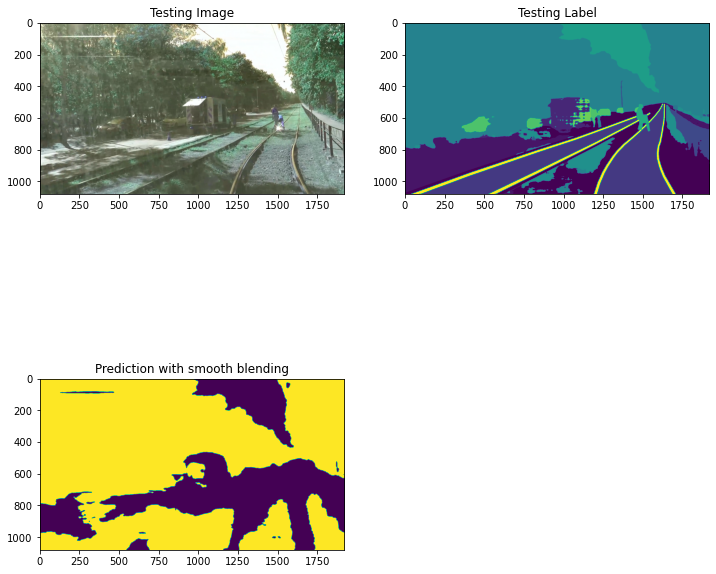

In [8]:
###################################################################################
# Predict using smooth blending

# Use the algorithm. The `pred_func` is passed and will process all the image 8-fold by tiling small patches with overlap, called once with all those image as a batch outer dimension.
# Note that model.predict(...) accepts a 4D tensor of shape (batch, x, y, nb_channels), such as a Keras model.
predictions_smooth = predict_img_with_smooth_windowing(
    input_img,
    window_size=patch_size,
    # Minimal amount of overlap for windowing. Must be an even number.
    subdivisions=2,
    nb_classes=n_classes,
    pred_func=(
        lambda img_batch_subdiv: model.predict((img_batch_subdiv))
    )
)


final_prediction = np.argmax(predictions_smooth, axis=2)

# Save prediction and original mask for comparison

plt.imsave('tram/model_test_result/rs00079_image.jpg', img)
plt.imsave('tram/model_test_result/rs00079_segmented.png', final_prediction)
plt.imsave('tram/model_test_result/rs00079_mask.png', original_mask)
###################


plt.figure(figsize=(12, 12))
plt.subplot(1, 3)
plt.title('Testing Image')
plt.imshow(img)
plt.subplot(2, 3)
plt.title('Testing Label')
plt.imshow(original_mask)
plt.subplot(3, 3)
plt.title('Prediction with smooth blending')
plt.imshow(final_prediction)
plt.show()

#############################


# test on rs00079.jpg

In [13]:
predictions_smooth = predict_img_with_smooth_windowing(
    input_img,
    window_size=patch_size,
    # Minimal amount of overlap for windowing. Must be an even number.
    subdivisions=2,
    nb_classes=n_classes,
    pred_func=(
        lambda img_batch_subdiv: model.predict((img_batch_subdiv))
    )
)
final_prediction = np.argmax(predictions_smooth, axis=2)

# Save prediction and original mask for comparison

plt.imsave('tram/model_test_result/rs00079_image.jpg', img)
plt.imsave('tram/model_test_result/rs00079_segmented.png', final_prediction)
plt.imsave('tram/model_test_result/rs00079_mask.png', original_mask)
###################


plt.figure(figsize=(12, 12))
plt.subplot(1, 3)
plt.title('Testing Image')
plt.imshow(img)
plt.subplot(2, 3)
plt.title('Testing Label')
plt.imshow(original_mask)
plt.subplot(3, 3)
plt.title('Prediction with smooth blending')
plt.imshow(final_prediction)
plt.show()

#############################


  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 54s 11s/step


 12%|█▎        | 1/8 [00:56<06:36, 56.60s/it]

5/5 [==============================] - 43s 9s/step


 25%|██▌       | 2/8 [01:41<04:58, 49.83s/it]

5/5 [==============================] - 46s 10s/step


 38%|███▊      | 3/8 [02:29<04:05, 49.05s/it]

5/5 [==============================] - 45s 9s/step


 50%|█████     | 4/8 [03:17<03:13, 48.44s/it]

5/5 [==============================] - 46s 10s/step


 62%|██████▎   | 5/8 [04:05<02:25, 48.51s/it]

5/5 [==============================] - 54s 10s/step


 75%|███████▌  | 6/8 [05:02<01:42, 51.38s/it]

5/5 [==============================] - 40s 8s/step


 88%|████████▊ | 7/8 [05:45<00:48, 48.64s/it]

5/5 [==============================] - 45s 9s/step


100%|██████████| 8/8 [06:33<00:00, 49.20s/it]


TypeError: subplot() takes 1 or 3 positional arguments but 2 were given

<Figure size 864x864 with 0 Axes>

# testing on a list of images 

In [17]:
label_of_interest = 8  # vegetation


  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 43s 10s/step


 12%|█▎        | 1/8 [00:44<05:14, 44.95s/it]

5/5 [==============================] - 41s 8s/step


 25%|██▌       | 2/8 [01:28<04:24, 44.02s/it]

5/5 [==============================] - 48s 10s/step


 38%|███▊      | 3/8 [02:19<03:57, 47.42s/it]

5/5 [==============================] - 55s 12s/step


 50%|█████     | 4/8 [03:16<03:25, 51.26s/it]

5/5 [==============================] - 48s 10s/step


 62%|██████▎   | 5/8 [04:08<02:33, 51.19s/it]

5/5 [==============================] - 56s 12s/step


 75%|███████▌  | 6/8 [05:07<01:47, 53.95s/it]

5/5 [==============================] - 47s 10s/step


 88%|████████▊ | 7/8 [05:57<00:52, 52.63s/it]

5/5 [==============================] - 50s 10s/step


100%|██████████| 8/8 [06:50<00:00, 51.26s/it]


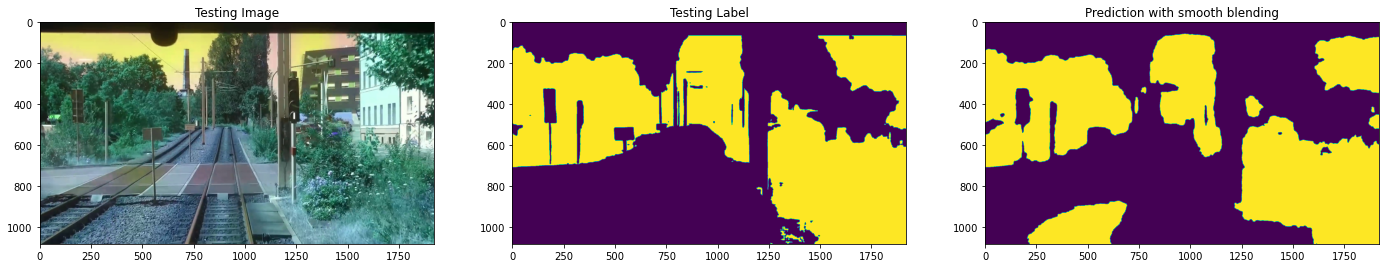

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 45s 9s/step


 12%|█▎        | 1/8 [00:47<05:31, 47.38s/it]

5/5 [==============================] - 50s 10s/step


 25%|██▌       | 2/8 [01:40<05:03, 50.57s/it]

5/5 [==============================] - 46s 9s/step


 38%|███▊      | 3/8 [02:29<04:10, 50.14s/it]

5/5 [==============================] - 45s 9s/step


 50%|█████     | 4/8 [03:17<03:17, 49.35s/it]

5/5 [==============================] - 45s 9s/step


 62%|██████▎   | 5/8 [04:05<02:26, 48.67s/it]

5/5 [==============================] - 46s 10s/step


 75%|███████▌  | 6/8 [04:54<01:37, 48.69s/it]

5/5 [==============================] - 47s 10s/step


 88%|████████▊ | 7/8 [05:44<00:49, 49.19s/it]

5/5 [==============================] - 46s 9s/step


100%|██████████| 8/8 [06:34<00:00, 49.28s/it]


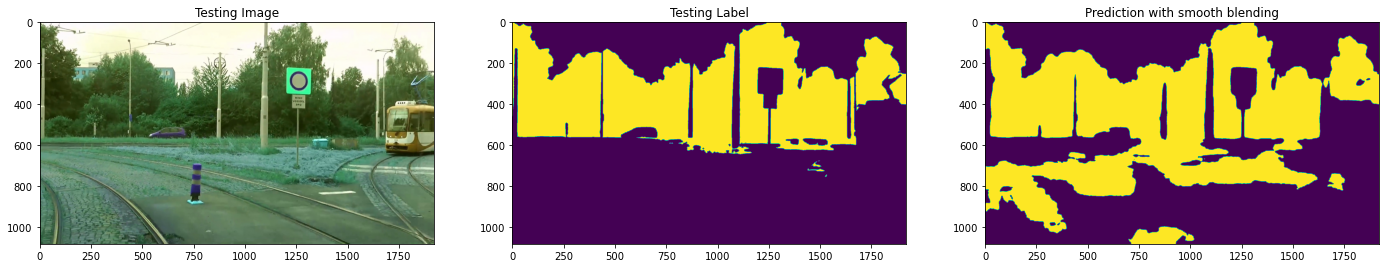

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 48s 10s/step


 12%|█▎        | 1/8 [00:50<05:56, 50.91s/it]

5/5 [==============================] - 48s 10s/step


 25%|██▌       | 2/8 [01:41<05:04, 50.69s/it]

5/5 [==============================] - 49s 10s/step


 38%|███▊      | 3/8 [02:33<04:16, 51.29s/it]

5/5 [==============================] - 44s 9s/step


 50%|█████     | 4/8 [03:20<03:17, 49.42s/it]

5/5 [==============================] - 46s 10s/step


 62%|██████▎   | 5/8 [04:08<02:27, 49.22s/it]

5/5 [==============================] - 51s 10s/step


 75%|███████▌  | 6/8 [05:01<01:41, 50.54s/it]

5/5 [==============================] - 42s 8s/step


 88%|████████▊ | 7/8 [05:46<00:48, 48.54s/it]

5/5 [==============================] - 45s 9s/step


100%|██████████| 8/8 [06:33<00:00, 49.24s/it]


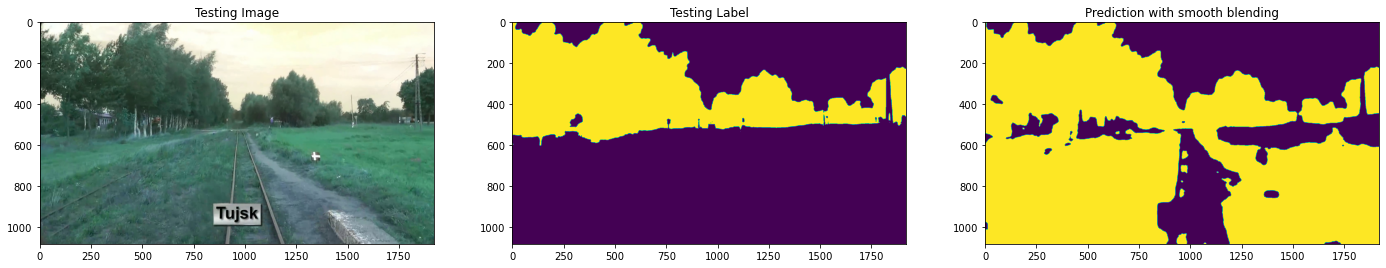

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 47s 9s/step


 12%|█▎        | 1/8 [00:49<05:45, 49.36s/it]

5/5 [==============================] - 40s 8s/step


 25%|██▌       | 2/8 [01:32<04:33, 45.58s/it]

5/5 [==============================] - 49s 10s/step


 38%|███▊      | 3/8 [02:24<04:03, 48.78s/it]

5/5 [==============================] - 50s 10s/step


 50%|█████     | 4/8 [03:17<03:21, 50.41s/it]

5/5 [==============================] - 48s 10s/step


 62%|██████▎   | 5/8 [04:08<02:31, 50.37s/it]

5/5 [==============================] - 49s 10s/step


 75%|███████▌  | 6/8 [05:00<01:41, 50.96s/it]

5/5 [==============================] - 48s 10s/step


 88%|████████▊ | 7/8 [05:50<00:50, 50.81s/it]

5/5 [==============================] - 51s 10s/step


100%|██████████| 8/8 [06:44<00:00, 50.55s/it]


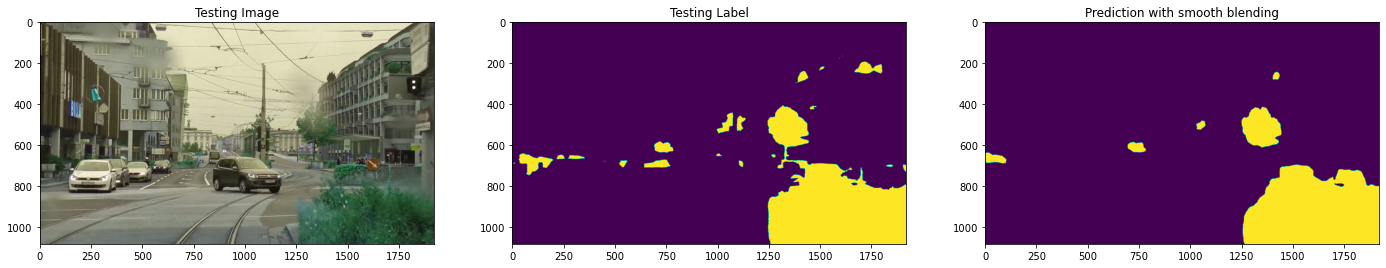

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 51s 10s/step


 12%|█▎        | 1/8 [00:53<06:15, 53.71s/it]

5/5 [==============================] - 48s 10s/step


 25%|██▌       | 2/8 [01:44<05:11, 51.86s/it]

5/5 [==============================] - 42s 9s/step


 38%|███▊      | 3/8 [02:28<04:01, 48.39s/it]

5/5 [==============================] - 45s 9s/step


 50%|█████     | 4/8 [03:17<03:14, 48.61s/it]

5/5 [==============================] - 62s 11s/step


 62%|██████▎   | 5/8 [04:23<02:44, 54.71s/it]

5/5 [==============================] - 48s 10s/step


 75%|███████▌  | 6/8 [05:47<02:09, 64.81s/it]

5/5 [==============================] - 53s 12s/step


 88%|████████▊ | 7/8 [06:43<01:01, 61.87s/it]

5/5 [==============================] - 61s 11s/step


100%|██████████| 8/8 [08:07<00:00, 60.98s/it]


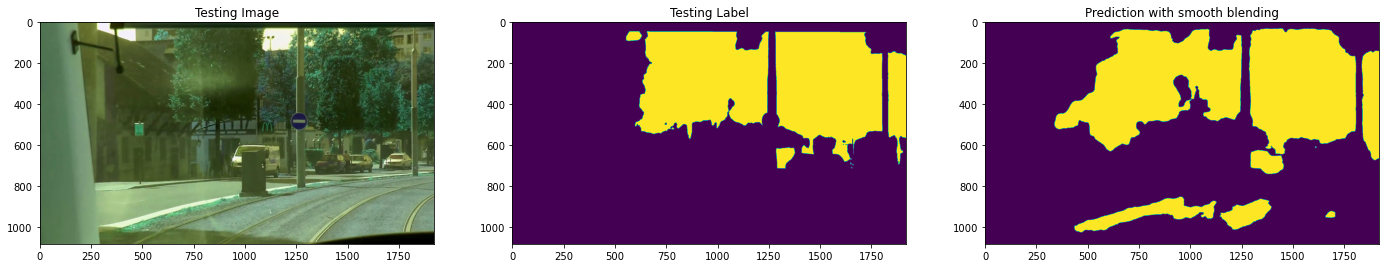

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 49s 11s/step


 12%|█▎        | 1/8 [00:51<05:59, 51.35s/it]

5/5 [==============================] - 53s 9s/step


 25%|██▌       | 2/8 [01:50<05:36, 56.04s/it]

5/5 [==============================] - 62s 11s/step


 38%|███▊      | 3/8 [02:59<05:09, 61.82s/it]

5/5 [==============================] - 50s 10s/step


 50%|█████     | 4/8 [03:52<03:53, 58.31s/it]

5/5 [==============================] - 37s 7s/step


 62%|██████▎   | 5/8 [04:31<02:34, 51.54s/it]

5/5 [==============================] - 36s 7s/step


 75%|███████▌  | 6/8 [05:11<01:34, 47.33s/it]

5/5 [==============================] - 41s 8s/step


 88%|████████▊ | 7/8 [05:54<00:46, 46.18s/it]

5/5 [==============================] - 34s 7s/step


100%|██████████| 8/8 [06:32<00:00, 49.00s/it]


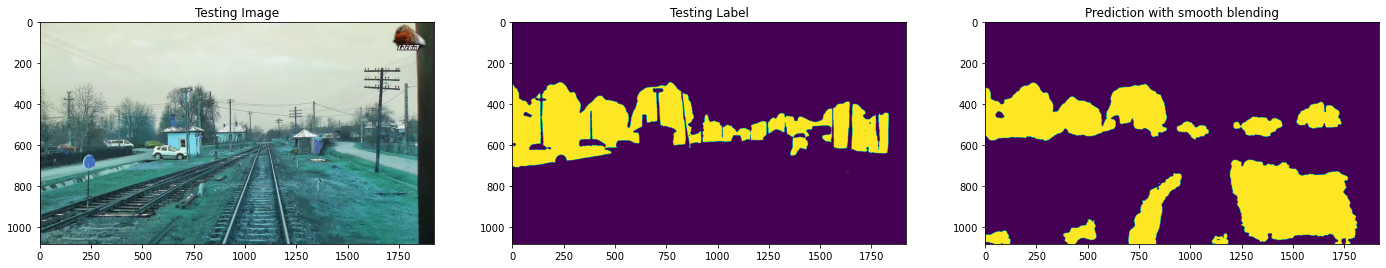

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 41s 9s/step


 12%|█▎        | 1/8 [00:44<05:11, 44.57s/it]

5/5 [==============================] - 47s 9s/step


 25%|██▌       | 2/8 [01:36<04:52, 48.80s/it]

5/5 [==============================] - 38s 7s/step


 38%|███▊      | 3/8 [02:17<03:47, 45.43s/it]

5/5 [==============================] - 41s 8s/step


 50%|█████     | 4/8 [03:03<03:02, 45.58s/it]

5/5 [==============================] - 41s 9s/step


 62%|██████▎   | 5/8 [03:48<02:16, 45.36s/it]

5/5 [==============================] - 35s 7s/step


 75%|███████▌  | 6/8 [04:27<01:26, 43.09s/it]

5/5 [==============================] - 39s 8s/step


 88%|████████▊ | 7/8 [05:09<00:42, 42.73s/it]

5/5 [==============================] - 46s 9s/step


100%|██████████| 8/8 [06:32<00:00, 49.12s/it]


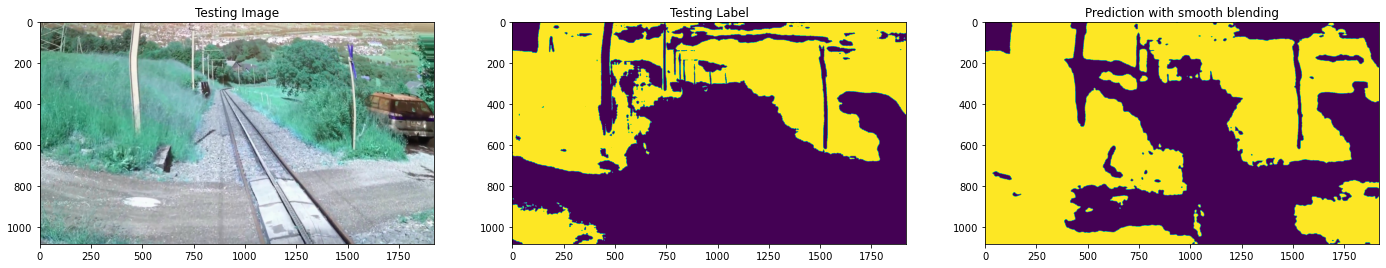

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 60s 11s/step


 12%|█▎        | 1/8 [01:02<07:14, 62.09s/it]

5/5 [==============================] - 41s 9s/step


 25%|██▌       | 2/8 [01:45<05:07, 51.22s/it]

5/5 [==============================] - 50s 10s/step


 38%|███▊      | 3/8 [02:38<04:19, 51.94s/it]

5/5 [==============================] - 46s 10s/step


 50%|█████     | 4/8 [03:26<03:22, 50.54s/it]

5/5 [==============================] - 46s 10s/step


 62%|██████▎   | 5/8 [04:15<02:29, 49.67s/it]

5/5 [==============================] - 56s 12s/step


 75%|███████▌  | 6/8 [05:13<01:45, 52.56s/it]

5/5 [==============================] - 35s 7s/step


 88%|████████▊ | 7/8 [05:50<00:47, 47.51s/it]

5/5 [==============================] - 53s 10s/step


100%|██████████| 8/8 [06:45<00:00, 50.68s/it]


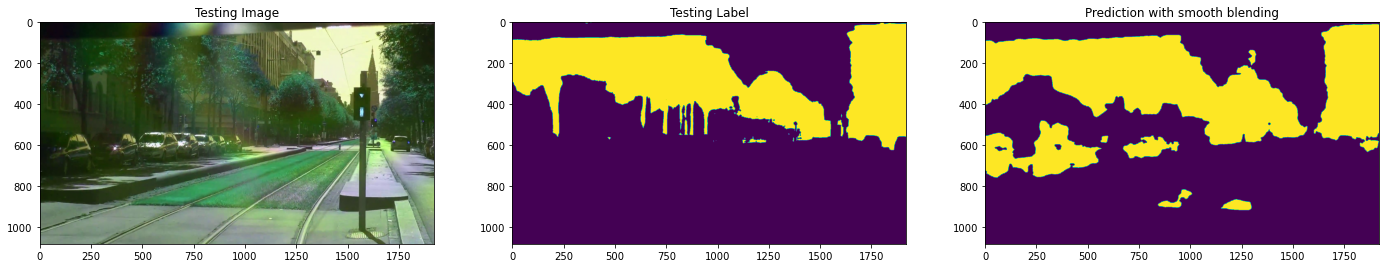

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 46s 9s/step


 12%|█▎        | 1/8 [00:48<05:38, 48.38s/it]

5/5 [==============================] - 42s 8s/step


 25%|██▌       | 2/8 [01:33<04:37, 46.24s/it]

5/5 [==============================] - 55s 11s/step


 38%|███▊      | 3/8 [02:32<04:20, 52.06s/it]

5/5 [==============================] - 53s 11s/step


 50%|█████     | 4/8 [03:28<03:35, 53.78s/it]

5/5 [==============================] - 62s 12s/step


 62%|██████▎   | 5/8 [04:33<02:52, 57.64s/it]

5/5 [==============================] - 82s 17s/step


 75%|███████▌  | 6/8 [06:01<02:16, 68.10s/it]

5/5 [==============================] - 55s 11s/step


 88%|████████▊ | 7/8 [07:01<01:05, 65.51s/it]

5/5 [==============================] - 58s 12s/step


100%|██████████| 8/8 [08:03<00:00, 60.42s/it]


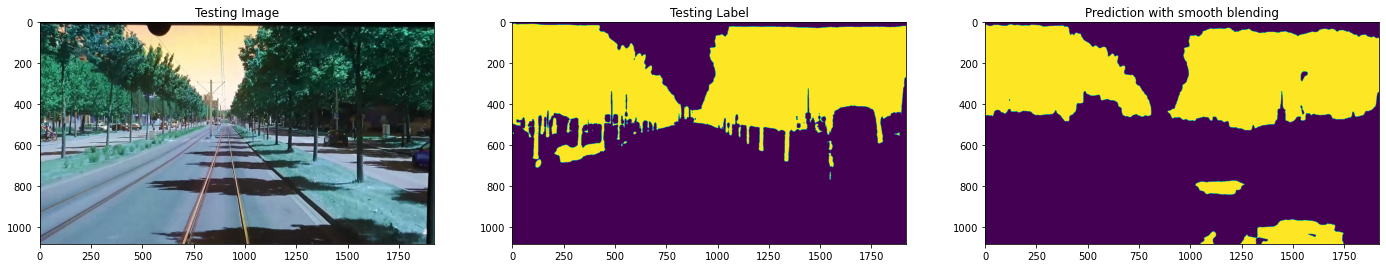

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 53s 11s/step


 12%|█▎        | 1/8 [00:55<06:29, 55.60s/it]

5/5 [==============================] - 55s 11s/step


 25%|██▌       | 2/8 [01:53<05:42, 57.11s/it]

5/5 [==============================] - 58s 12s/step


 38%|███▊      | 3/8 [02:54<04:54, 58.84s/it]

5/5 [==============================] - 59s 12s/step


 50%|█████     | 4/8 [03:57<04:01, 60.43s/it]

5/5 [==============================] - 64s 12s/step


 62%|██████▎   | 5/8 [05:05<03:09, 63.30s/it]

5/5 [==============================] - 69s 13s/step


 75%|███████▌  | 6/8 [06:20<02:13, 66.96s/it]

5/5 [==============================] - 72s 15s/step


 88%|████████▊ | 7/8 [07:36<01:10, 70.10s/it]

5/5 [==============================] - 61s 12s/step


100%|██████████| 8/8 [09:01<00:00, 67.67s/it]


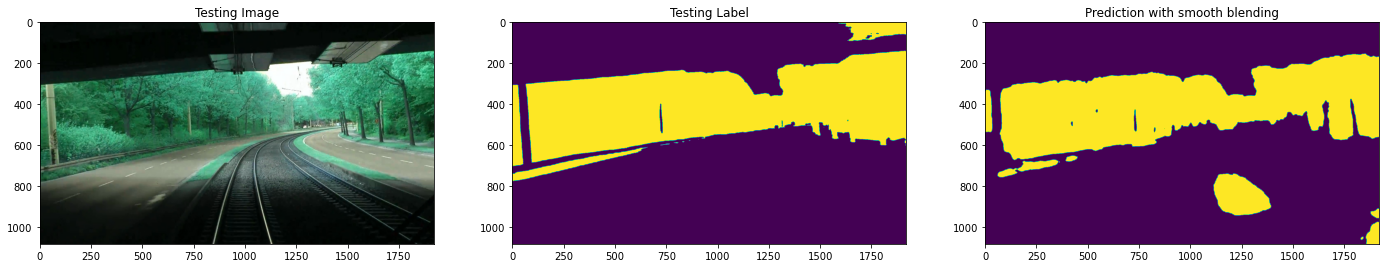

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 66s 13s/step


 12%|█▎        | 1/8 [01:09<08:05, 69.32s/it]

5/5 [==============================] - 65s 13s/step


 25%|██▌       | 2/8 [02:18<06:55, 69.21s/it]

5/5 [==============================] - 59s 12s/step


 38%|███▊      | 3/8 [03:21<05:30, 66.19s/it]

5/5 [==============================] - 51s 11s/step


 50%|█████     | 4/8 [04:15<04:06, 61.52s/it]

5/5 [==============================] - 51s 11s/step


 62%|██████▎   | 5/8 [05:09<02:57, 59.01s/it]

5/5 [==============================] - 51s 10s/step


 75%|███████▌  | 6/8 [06:04<01:55, 57.60s/it]

5/5 [==============================] - 49s 10s/step


 88%|████████▊ | 7/8 [06:56<00:55, 55.70s/it]

5/5 [==============================] - 55s 10s/step


100%|██████████| 8/8 [07:55<00:00, 59.40s/it]


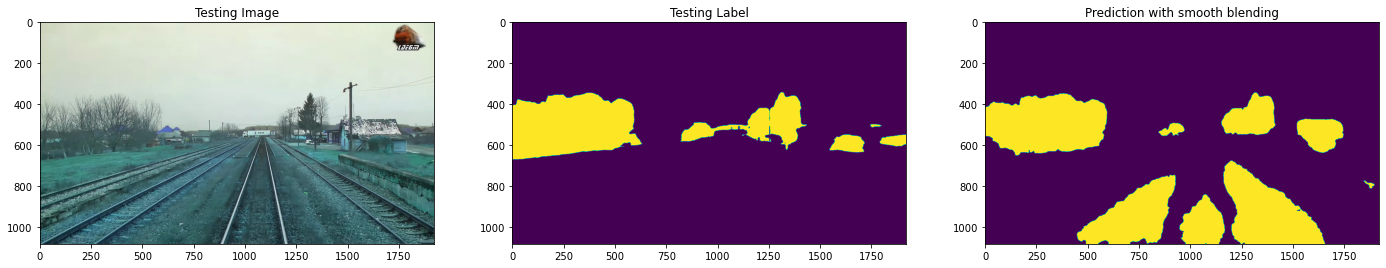

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 54s 11s/step


 12%|█▎        | 1/8 [00:56<06:37, 56.79s/it]

5/5 [==============================] - 52s 10s/step


 25%|██▌       | 2/8 [01:51<05:33, 55.62s/it]

5/5 [==============================] - 52s 11s/step


 38%|███▊      | 3/8 [02:46<04:35, 55.16s/it]

5/5 [==============================] - 50s 10s/step


 50%|█████     | 4/8 [03:38<03:36, 54.15s/it]

5/5 [==============================] - 55s 12s/step


 62%|██████▎   | 5/8 [04:36<02:46, 55.42s/it]

5/5 [==============================] - 49s 10s/step


 75%|███████▌  | 6/8 [05:28<01:48, 54.36s/it]

5/5 [==============================] - 52s 10s/step


 88%|████████▊ | 7/8 [06:24<00:54, 54.83s/it]

5/5 [==============================] - 60s 12s/step


100%|██████████| 8/8 [07:48<00:00, 58.55s/it]


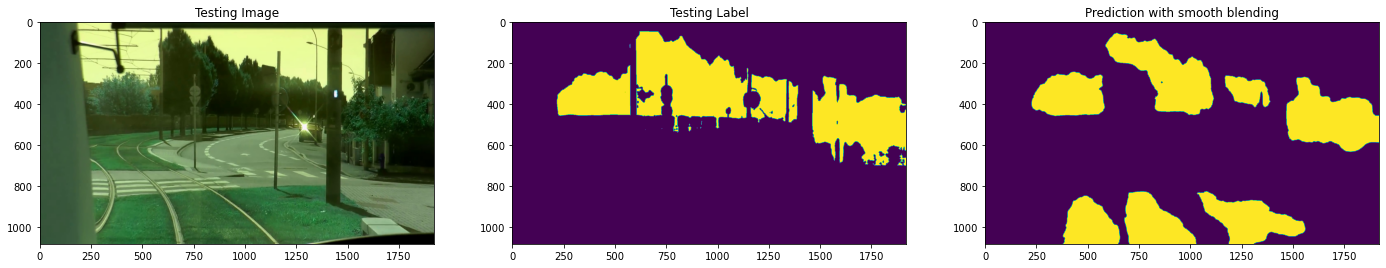

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 59s 12s/step


 12%|█▎        | 1/8 [01:01<07:13, 61.96s/it]

5/5 [==============================] - 52s 10s/step


 25%|██▌       | 2/8 [01:56<05:46, 57.78s/it]

5/5 [==============================] - 51s 10s/step


 38%|███▊      | 3/8 [02:51<04:40, 56.17s/it]

5/5 [==============================] - 48s 10s/step


 50%|█████     | 4/8 [03:42<03:36, 54.17s/it]

5/5 [==============================] - 53s 11s/step


 62%|██████▎   | 5/8 [04:37<02:43, 54.66s/it]

5/5 [==============================] - 47s 9s/step


 75%|███████▌  | 6/8 [05:27<01:45, 52.93s/it]

5/5 [==============================] - 48s 9s/step


 88%|████████▊ | 7/8 [06:18<00:52, 52.30s/it]

5/5 [==============================] - 52s 10s/step


100%|██████████| 8/8 [07:13<00:00, 54.22s/it]


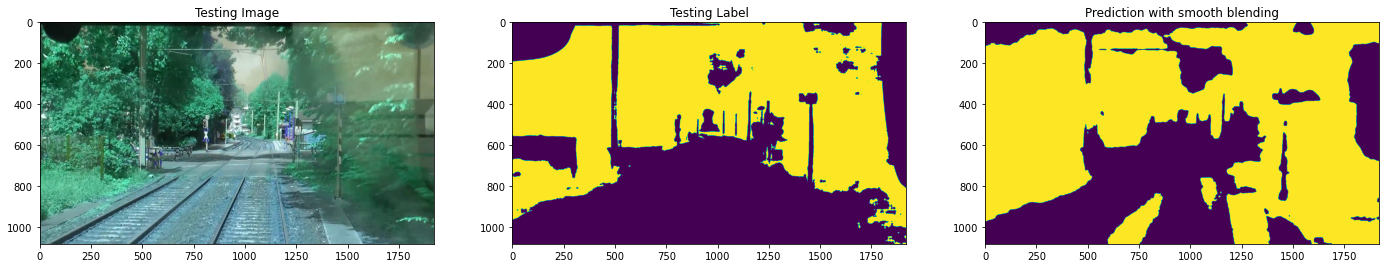

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 53s 10s/step


 12%|█▎        | 1/8 [00:56<06:33, 56.15s/it]

5/5 [==============================] - 52s 10s/step


 25%|██▌       | 2/8 [01:51<05:34, 55.81s/it]

5/5 [==============================] - 52s 11s/step


 38%|███▊      | 3/8 [02:46<04:36, 55.33s/it]

5/5 [==============================] - 50s 11s/step


 50%|█████     | 4/8 [03:39<03:37, 54.50s/it]

5/5 [==============================] - 74s 15s/step


 62%|██████▎   | 5/8 [04:56<03:08, 62.71s/it]

5/5 [==============================] - 43s 9s/step


 75%|███████▌  | 6/8 [05:44<01:54, 57.43s/it]

5/5 [==============================] - 43s 8s/step


 88%|████████▊ | 7/8 [06:30<00:53, 53.82s/it]

5/5 [==============================] - 46s 10s/step


100%|██████████| 8/8 [07:19<00:00, 54.99s/it]


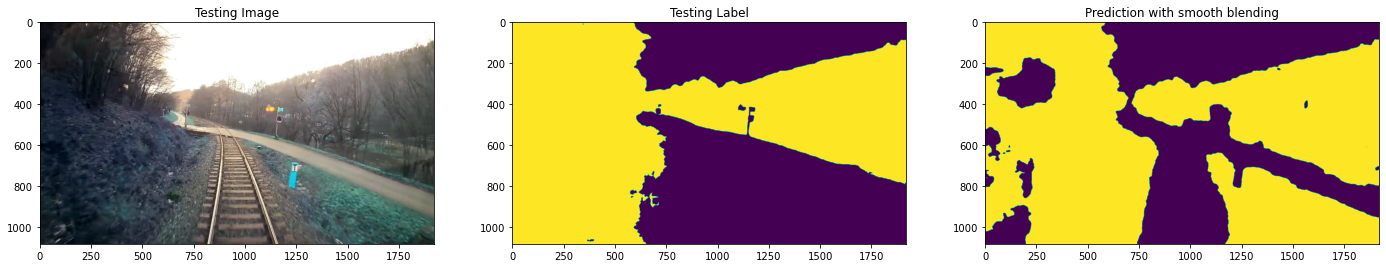

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 46s 9s/step


 12%|█▎        | 1/8 [00:49<05:43, 49.07s/it]

5/5 [==============================] - 43s 9s/step


 25%|██▌       | 2/8 [01:35<04:46, 47.73s/it]

5/5 [==============================] - 41s 8s/step


 38%|███▊      | 3/8 [02:20<03:50, 46.20s/it]

5/5 [==============================] - 52s 11s/step


 50%|█████     | 4/8 [03:16<03:19, 50.00s/it]

5/5 [==============================] - 54s 10s/step


 62%|██████▎   | 5/8 [04:13<02:37, 52.66s/it]

5/5 [==============================] - 52s 11s/step


 75%|███████▌  | 6/8 [05:09<01:47, 53.80s/it]

5/5 [==============================] - 43s 9s/step


 88%|████████▊ | 7/8 [05:55<00:51, 51.38s/it]

5/5 [==============================] - 57s 12s/step


100%|██████████| 8/8 [06:57<00:00, 52.23s/it]


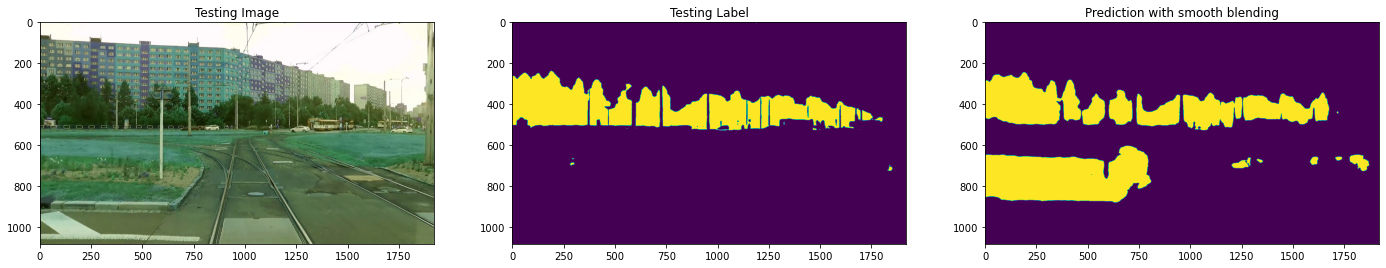

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 66s 13s/step


 12%|█▎        | 1/8 [01:10<08:13, 70.54s/it]

5/5 [==============================] - 59s 11s/step


 25%|██▌       | 2/8 [02:13<06:35, 65.84s/it]

5/5 [==============================] - 50s 10s/step


 38%|███▊      | 3/8 [03:08<05:05, 61.19s/it]

5/5 [==============================] - 38s 8s/step


 50%|█████     | 4/8 [03:53<03:39, 54.80s/it]

5/5 [==============================] - 42s 8s/step


 62%|██████▎   | 5/8 [04:38<02:33, 51.06s/it]

5/5 [==============================] - 41s 8s/step


 75%|███████▌  | 6/8 [05:22<01:37, 48.72s/it]

5/5 [==============================] - 41s 8s/step


 88%|████████▊ | 7/8 [06:08<00:47, 47.81s/it]

5/5 [==============================] - 39s 8s/step


100%|██████████| 8/8 [06:56<00:00, 52.06s/it]


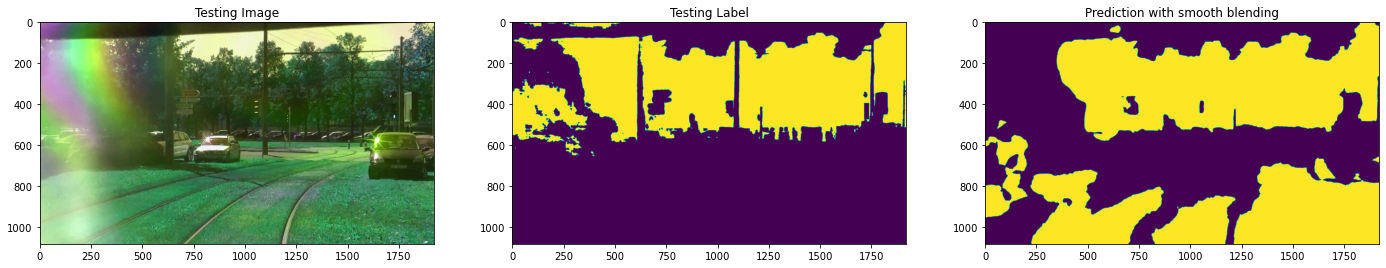

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 90s 18s/step


 12%|█▎        | 1/8 [01:38<11:26, 98.01s/it]

5/5 [==============================] - 52s 8s/step


 25%|██▌       | 2/8 [02:34<07:22, 73.71s/it]

5/5 [==============================] - 53s 11s/step


 38%|███▊      | 3/8 [03:31<05:30, 66.13s/it]

5/5 [==============================] - 56s 11s/step


 50%|█████     | 4/8 [04:31<04:14, 63.52s/it]

5/5 [==============================] - 52s 11s/step


 62%|██████▎   | 5/8 [05:26<03:01, 60.63s/it]

5/5 [==============================] - 51s 10s/step


 75%|███████▌  | 6/8 [06:20<01:56, 58.26s/it]

5/5 [==============================] - 51s 10s/step


 88%|████████▊ | 7/8 [07:14<00:56, 56.83s/it]

5/5 [==============================] - 51s 10s/step


100%|██████████| 8/8 [08:07<00:00, 60.99s/it]


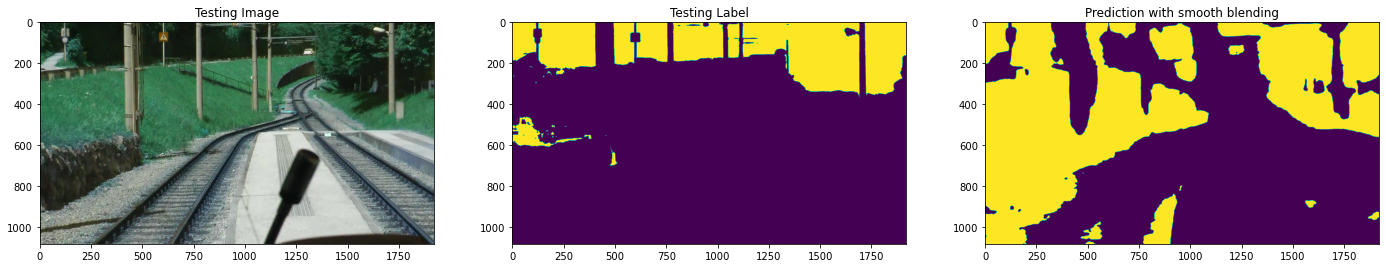

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 53s 10s/step


 12%|█▎        | 1/8 [00:55<06:28, 55.56s/it]

5/5 [==============================] - 55s 11s/step


 25%|██▌       | 2/8 [01:53<05:43, 57.23s/it]

5/5 [==============================] - 55s 10s/step


 38%|███▊      | 3/8 [02:52<04:49, 57.97s/it]

5/5 [==============================] - 50s 10s/step


 50%|█████     | 4/8 [03:45<03:44, 56.07s/it]

5/5 [==============================] - 53s 10s/step


 62%|██████▎   | 5/8 [04:41<02:47, 55.82s/it]

5/5 [==============================] - 54s 11s/step


 75%|███████▌  | 6/8 [05:38<01:52, 56.29s/it]

5/5 [==============================] - 47s 10s/step


 88%|████████▊ | 7/8 [06:28<00:54, 54.13s/it]

5/5 [==============================] - 54s 11s/step


100%|██████████| 8/8 [07:25<00:00, 55.71s/it]


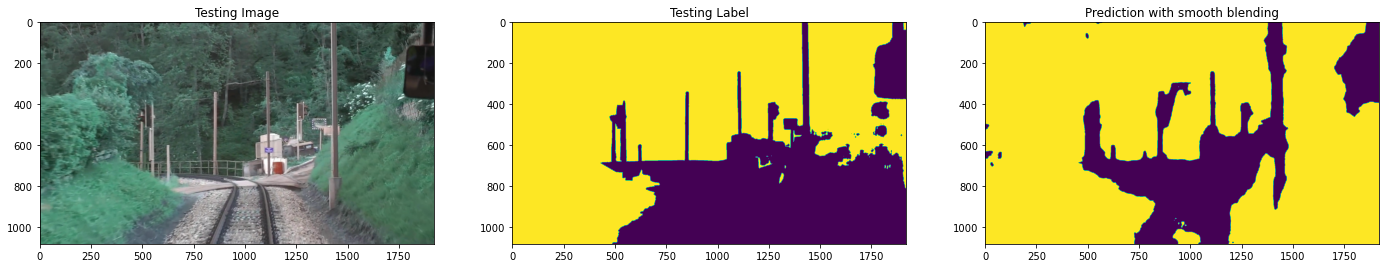

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 48s 10s/step


 12%|█▎        | 1/8 [00:50<05:55, 50.76s/it]

5/5 [==============================] - 52s 11s/step


 25%|██▌       | 2/8 [01:48<05:30, 55.09s/it]

5/5 [==============================] - 58s 12s/step


 38%|███▊      | 3/8 [02:51<04:53, 58.69s/it]

5/5 [==============================] - 54s 11s/step


 50%|█████     | 4/8 [03:49<03:52, 58.23s/it]

5/5 [==============================] - 56s 11s/step


 62%|██████▎   | 5/8 [04:48<02:55, 58.52s/it]

5/5 [==============================] - 51s 10s/step


 75%|███████▌  | 6/8 [05:41<01:53, 56.76s/it]

5/5 [==============================] - 55s 11s/step


 88%|████████▊ | 7/8 [06:39<00:57, 57.16s/it]

5/5 [==============================] - 50s 9s/step


100%|██████████| 8/8 [07:31<00:00, 56.49s/it]


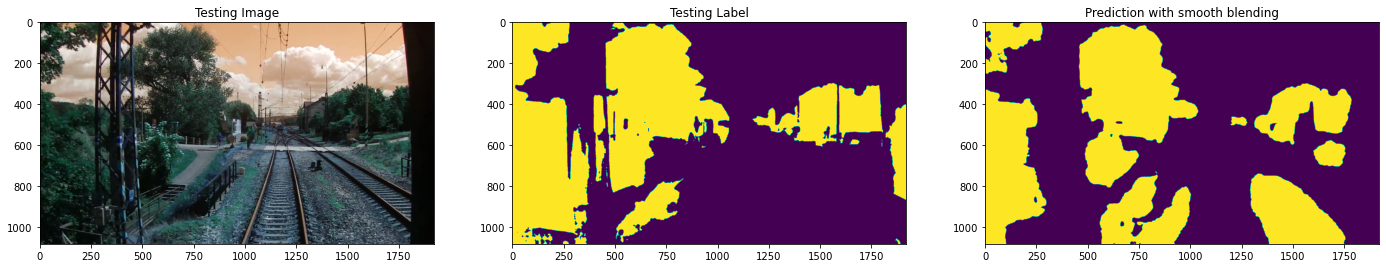

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 52s 10s/step


 12%|█▎        | 1/8 [00:55<06:26, 55.28s/it]

5/5 [==============================] - 52s 10s/step


 25%|██▌       | 2/8 [01:50<05:32, 55.39s/it]

5/5 [==============================] - 49s 10s/step


 38%|███▊      | 3/8 [02:42<04:29, 53.95s/it]

5/5 [==============================] - 47s 9s/step


 50%|█████     | 4/8 [03:32<03:29, 52.38s/it]

5/5 [==============================] - 47s 9s/step


 62%|██████▎   | 5/8 [04:22<02:34, 51.50s/it]

5/5 [==============================] - 48s 10s/step


 75%|███████▌  | 6/8 [05:13<01:42, 51.21s/it]

5/5 [==============================] - 51s 10s/step


 88%|████████▊ | 7/8 [06:07<00:52, 52.05s/it]

5/5 [==============================] - 54s 11s/step


100%|██████████| 8/8 [07:04<00:00, 53.10s/it]


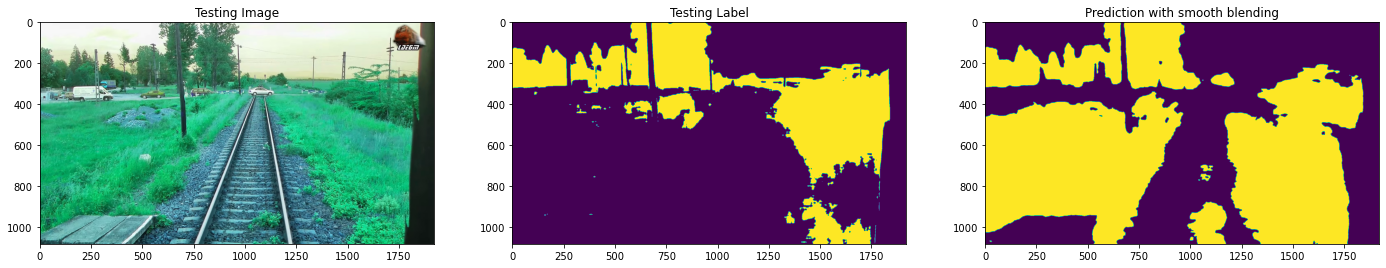

  0%|          | 0/8 [00:00<?, ?it/s]

5/5 [==============================] - 59s 11s/step


 12%|█▎        | 1/8 [01:02<07:14, 62.08s/it]

5/5 [==============================] - 45s 8s/step


 25%|██▌       | 2/8 [01:49<05:20, 53.49s/it]

5/5 [==============================] - 59s 12s/step


 38%|███▊      | 3/8 [02:51<04:46, 57.38s/it]

5/5 [==============================] - 54s 11s/step


 50%|█████     | 4/8 [03:48<03:48, 57.17s/it]

5/5 [==============================] - 54s 11s/step


 62%|██████▎   | 5/8 [04:45<02:51, 57.04s/it]

5/5 [==============================] - 53s 11s/step


 75%|███████▌  | 6/8 [05:41<01:53, 56.71s/it]

5/5 [==============================] - 46s 9s/step


 88%|████████▊ | 7/8 [06:30<00:54, 54.22s/it]

5/5 [==============================] - 47s 10s/step


100%|██████████| 8/8 [07:20<00:00, 55.05s/it]


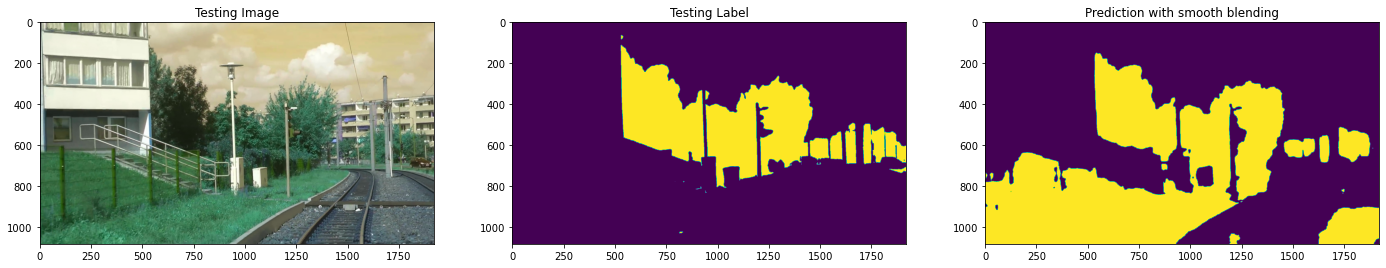

In [18]:
for imgfile in range(len(test_list)):
    img= cv2.imread('tram/jpgs/'+test_list[imgfile]+'.jpg')#read only tram images the images from rs19val directory
    input_img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    input_img = preprocess_input(input_img)

    #read the mask of corresponding images from the test_list
    original_mask = cv2.imread('tram/uint8/'+test_list[imgfile]+'.png')
    original_mask = original_mask[:,:,0]  #Use only single channel...
    # convert the labels to label of interest only 
    original_mask[:,:][original_mask[:,:]!=label_of_interest]=0
    original_mask[:,:][original_mask[:,:]==label_of_interest]=1


    # smoothen the large images by using the function from predined library 
    predictions_smooth = predict_img_with_smooth_windowing(
        input_img,
        window_size=patch_size,
        subdivisions=2,  # Minimal amount of overlap for windowing. Must be an even number.
        nb_classes=n_classes,
        pred_func=(
            lambda img_batch_subdiv: model.predict((img_batch_subdiv))
        )
    )
    final_prediction = np.argmax(predictions_smooth, axis=2)

    #Save prediction and original mask for comparison

    plt.imsave('tram/model_test_result/'+test_list[imgfile]+'_image.jpg', img)
    plt.imsave('tram/model_test_result/'+test_list[imgfile]+'segmented.png', final_prediction)
    plt.imsave('tram/model_test_result/'+test_list[imgfile]+'_mask.png', original_mask)

    # plot 
    plt.figure(figsize=(24, 16))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(img)
    plt.subplot(232)
    plt.title('Testing Label')
    plt.imshow(original_mask)
    plt.subplot(233)
    plt.title('Prediction with smooth blending')
    plt.imshow(final_prediction)
    plt.show()
    